In [1]:
import numpy as np

In [2]:
class NQueenProblem:
  def __init__(self, n):
    self.n = n
    self.start_state = self.create_start_state()

  def create_start_state(self):
    import numpy as np
    board = np.zeros([self.n,self.n])
    for i in range(0, self.n):
      board[i, i]=1
    self.start_state = board
    return board

  def end_state(self, board):
    ## horizontal & vertical
    for i in range(0, self.n):
      if sum(board[i,]) > 1:
        return False
      if sum(board[:,i]) > 1:
        return False
    ## diagonal
    for i in range(self.n):
      for j in range(i+1, self.n):
        xpos1 = np.nonzero(board)[1][i]
        xpos2 = np.nonzero(board)[1][j]
        ypos1 = np.nonzero(board)[0][i]
        ypos2 = np.nonzero(board)[0][j]
        
        if xpos1 - xpos2!=0:
            if (abs((ypos1 - ypos2)/(xpos1 - xpos2)) == 1):
              return False
    return True

  def action(self, board, qi, dir):
    newboard = np.array(board)
    xpos = np.nonzero(board)[1][qi]
    ypos = np.nonzero(board)[0][qi]
    #print(xpos, ypos)

    if (dir == "L"):
      if xpos == 0:
        return (False, (qi, "L"), newboard, 0)
      #print("OLD POSITION")
      #print(board)
      newboard[ypos, xpos] = 0
      newboard[ypos, xpos-1] = 1
      #print("ACTION: ", qi, incs, dir)
      #print("NEW POSITION")
      #print(board)
      return (True, (qi, "L"), newboard, 1)

    if (dir == "R"):
      if xpos == self.n-1:
        return [False, (qi, "R"), newboard, 0]
      #print("OLD POSITION")
      #print(board)
      newboard[ypos, xpos] = 0
      newboard[ypos, xpos+1] = 1
      #print("ACTION: ", qi, smn, dir)
      #print("NEW POSITION")
      #print(board)
      return (True, (qi, "R"), newboard, 1)

    return (False, (qi, ""), newboard, 0)

  def action_board_cost_hcost(self,board):
        # create (action, new_state, cpies) tuple
        result=[]

        for i in range(0, self.n):
            newrl = self.action(board, self.n-i-1, "L")
            consl = self.conflicts(newrl[2]) + newrl[3]
            newrl = (*newrl, consl)
            if newrl[0]:
              result.append(newrl[1:5])

            newrr = self.action(board, self.n-i-1, "R")
            consr = self.conflicts(newrr[2]) + newrr[3]
            newrr = (*newrr, consr)
            if newrr[0]:
              result.append(newrr[1:5])
        #print(consr, consl)
        return result
  def conflicts(self, board):
    cons = 0
    for i in range(0, self.n):
      if sum(board[i,]) > 1:
        cons = cons + sum(board[i,]) - 1
        #print("hor")
      if sum(board[:,i]) > 1:
        cons = cons + sum(board[:,i]) - 1
        #print("ver")
    ## diagonal
    for i in range(self.n):
      for j in range(i+1, self.n):
        xpos1 = np.nonzero(board)[1][i]
        xpos2 = np.nonzero(board)[1][j]
        ypos1 = np.nonzero(board)[0][i]
        ypos2 = np.nonzero(board)[0][j]
        if xpos1 - xpos2!=0:
            if (abs((ypos1 - ypos2)/(xpos1 - xpos2)) == 1):
              cons = cons + 1
              #print("diag", xpos1, ypos1, xpos2, ypos2)
    return cons

In [3]:
q4 = NQueenProblem(n=4)
a, b, c, d = q4.action_board_cost_hcost(q4.start_state)[0]

In [4]:
def sort_tuple(tup):
    #print(tup)
    tup.sort(key=lambda x: x[3],reverse=True)
    return tup

In [5]:
def uniformcostsearch(problem=NQueenProblem(n=4)):
    frontier={}
    explored={}
    frontier[tuple(map(tuple, problem.start_state))]=0
    parent = {}
    ncost = {}
    ncost[tuple(map(tuple, problem.start_state))] = 0
    stepto = {}
    while len(frontier)>0:

        state_with_minimum_pastcost=min(frontier, key=frontier.get) ##current
        value=frontier[state_with_minimum_pastcost] ##current cost
        explored[state_with_minimum_pastcost]=value ##into explored
        del frontier[state_with_minimum_pastcost] ##out of frontier

        if problem.end_state(np.array(state_with_minimum_pastcost)): ##Check end state
            n = state_with_minimum_pastcost
            hist = []
            stephist = []
            while True:
                hist.append(n)
                if np.all(problem.start_state == np.array(n)):
                    break
                stephist.append(stepto[n])
                n = parent[n]
            return(explored[state_with_minimum_pastcost], state_with_minimum_pastcost, hist[::-1], stephist[::-1])
        for action, newState, cost, hcost in sort_tuple(problem.action_board_cost_hcost(np.array(state_with_minimum_pastcost))): ## for child of current
            if tuple(map(tuple, newState)) in explored: ## if explored
                if ncost[tuple(map(tuple, newState))] > cost + value:
                    ncost[tuple(map(tuple, newState))] = cost + value
                    parent[tuple(map(tuple, newState))] = state_with_minimum_pastcost
                    stepto[tuple(map(tuple, newState))] = action
                continue
            else:
                frontier[tuple(map(tuple, newState))]= cost + value
                ncost[tuple(map(tuple, newState))] = cost + value
                parent[tuple(map(tuple, newState))] = state_with_minimum_pastcost
                stepto[tuple(map(tuple, newState))] = action

In [6]:
uniformcostsearch()

(6,
 ((0.0, 0.0, 1.0, 0.0),
  (1.0, 0.0, 0.0, 0.0),
  (0.0, 0.0, 0.0, 1.0),
  (0.0, 1.0, 0.0, 0.0)),
 [((1.0, 0.0, 0.0, 0.0),
   (0.0, 1.0, 0.0, 0.0),
   (0.0, 0.0, 1.0, 0.0),
   (0.0, 0.0, 0.0, 1.0)),
  ((0.0, 1.0, 0.0, 0.0),
   (0.0, 1.0, 0.0, 0.0),
   (0.0, 0.0, 1.0, 0.0),
   (0.0, 0.0, 0.0, 1.0)),
  ((0.0, 0.0, 1.0, 0.0),
   (0.0, 1.0, 0.0, 0.0),
   (0.0, 0.0, 1.0, 0.0),
   (0.0, 0.0, 0.0, 1.0)),
  ((0.0, 0.0, 1.0, 0.0),
   (1.0, 0.0, 0.0, 0.0),
   (0.0, 0.0, 1.0, 0.0),
   (0.0, 0.0, 0.0, 1.0)),
  ((0.0, 0.0, 1.0, 0.0),
   (1.0, 0.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 1.0),
   (0.0, 0.0, 0.0, 1.0)),
  ((0.0, 0.0, 1.0, 0.0),
   (1.0, 0.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 1.0),
   (0.0, 0.0, 1.0, 0.0)),
  ((0.0, 0.0, 1.0, 0.0),
   (1.0, 0.0, 0.0, 0.0),
   (0.0, 0.0, 0.0, 1.0),
   (0.0, 1.0, 0.0, 0.0))],
 [(0, 'R'), (0, 'R'), (1, 'L'), (2, 'R'), (3, 'L'), (3, 'L')])

In [7]:
def display(solution):
    mincost, final_state, path, steps = solution
    print("MINIMUM COST: ", mincost)
    print("FINAL STATE:")
    print(np.array(final_state))
    print()
    print("PATH:")
    for i in range(0, len(steps)):
        print(np.array(path[i]))
        print(np.array(steps[i]))
    print(np.array(final_state))

In [9]:
display(uniformcostsearch(problem=NQueenProblem(n=5)))

MINIMUM COST:  6
FINAL STATE:
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]

PATH:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
['1' 'R']
[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
['1' 'R']
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
['2' 'L']
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
['3' 'R']
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
['4' 'L']
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]
['4' 'L']
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


In [11]:
import time

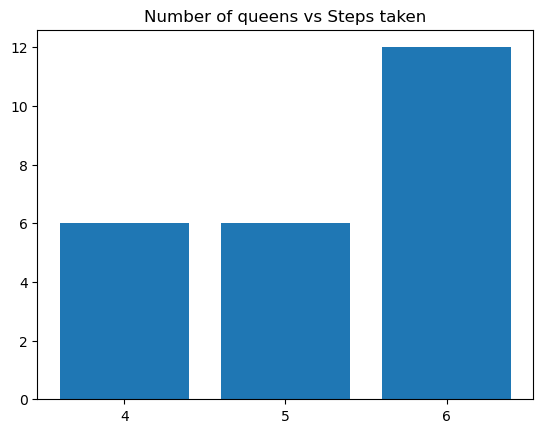

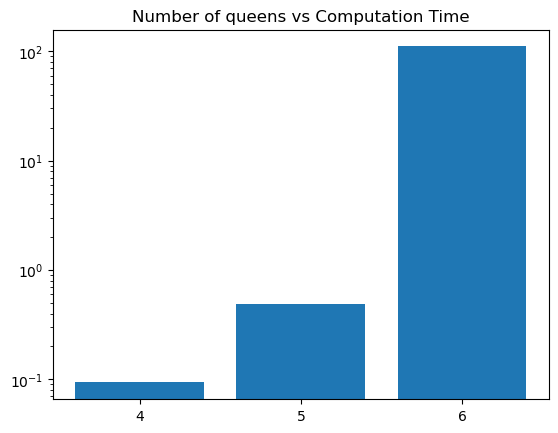

In [12]:
st4 = time.process_time()
steps4 = uniformcostsearch(problem=NQueenProblem(n=4))[0]
et4 = time.process_time()
st5 = time.process_time()
steps5 = uniformcostsearch(problem=NQueenProblem(n=5))[0]
et5 = time.process_time()
st6 = time.process_time()
steps6 = uniformcostsearch(problem=NQueenProblem(n=6))[0]
et6 = time.process_time()
##st7 = time.process_time()
##steps7 = uniformcostsearch(problem=NQueenProblem(n=7))[3]
##et7 = time.process_time()

ts = [et4-st4, et5-st5, et6-st6]
steps = [steps4, steps5, steps6]
ns = ["4", "5", "6"]

import matplotlib.pyplot as plt

plt.bar(ns, steps)
plt.title("Number of queens vs Steps taken")
plt.show()

plt.bar(ns, ts)
plt.title("Number of queens vs Computation Time")
plt.yscale("log") 
plt.show()